## Udacity Data Scientist NanoDegree - Project 1: Write a Data Science Blog (Seatle Airbnb Data)

"Write a Data Science Blog" project is part of Udacity Data Scientist Nanodegree program. Before starting project, I learned CRISP-DM (Cross Industry Standard Process for Data Mining) metodology. This metodology is followed to make data analysis and prediction with Seatle Airbnb data before writing data science blog post in Medium.     

#### 1. Business Understanding

Seatle Airbnb calendar dataset is available from Kaggle https://www.kaggle.com/airbnb/seattle/data#calendar.csv
This dataset includes listing id and the price and availability for that day.
Seatle Airbnb listing dataset is available from Kaggle (https://www.kaggle.com/airbnb/seattle/data#listings.csv)
This dataset includes full descriptions and average review score for listed places.
Before starting data analysis, I define objective to get better knowledge about influential factors on price, like calendar, amnenities and location. Therefore, I define three business question before starting analysis:

1.How do Seatle accommodation prices monthly change to observe season impact on price? 

2.What is the most popular amenities in Seatle Airbnb Listing Data?

3.What are the most influential factors to estimate price in Seatle Airbnb Listing Data?

#### 2. Data Understanding

##### Seatle Airbnb Calendar Data 
It has 1.393.570 rows and 4 columns representing price and availability of related day. Listing_id column is integer, other columns are object data type. Approximately 33% of price column is null value. Other columns have no null values.

##### Seatle Airbnb Listing Data 
It has 3818 rows (entries) and 92 columns representing listing attributes.
47 columns have null data. After checking null values in dataset; there were two columns having more than 75% null data. Thess columns are "license" and "square_feet". Furthermore, I also checked data type distribution of columns. We can say that 1 / 3 of dataset are numerical (float and integer). 

Results:
1.Object data type: 62 columns
2.float64 data type: 17 columns
3.int64 data type: 13 columns.

There were 62 object type columns (approximately 2/3 of dataset). Furthermore, data types of some columns were not properly defined. For instance; some price columns are set as object instead of float or integer.

#### 3. Data Preparation

For Seatle Airbnb Calendar Dataset, first of all data types of columns are fixed. Data type of price column is changed from object to float. Then, price column has missing values (approximately %33). I have filled these missing values with mean of price before starting data analysis. (Data imputation)

For Seatle Airbnb Listing Dataset,  

#### 4. Data Modeling
I have used LinearRegression and train_test_split methods to design model and predict price according to 16 variables as imput. 

#### 5. Evaluation

I used 16 variables which may impact on predicting price. r-squared value of my model is 0.53 which is not too high. According to my model, geographic location (longitude, latitude), the number of bedroom and bathroom, review score variables have impact while predicting price in Seatle Airbnb Data.

#### 6. Deployment

Results are summarized in the Medium data science post.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
# Sklearn ML Modules
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder,OneHotEncoder,StandardScaler 
import sklearn.metrics as mtr
import math
%matplotlib inline

In order to get a better understanding of the data, I look at some of the characteristics of the dataset (Data Understanding phase of CRISP-DM)

In [3]:
# Read calendar dataset and observe 5 sample dataset
df_c = pd.read_csv('./calendar.csv')
df_c.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Number of rows and columns in calendar dataset
df_c.shape 

(1393570, 4)

In [5]:
# Describe the calendar dataset
df_c.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [6]:
# Column information of calendar dataset
#There were 3 object type columns. Data types of some columns were not properly defined. 
#For instance; price column is set object instead of float or integer.
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
# Observe missing data according to their percentage for calendar dataset
null_ratio = df_c.isnull().sum()/df_c.shape[0]
null_ratio.sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [8]:
# Distribution of columns's data types for calendar dataset
df_c.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [9]:
# Read listing dataset and observe 5 sample dataset
df_l = pd.read_csv('./listings.csv')
df_l.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [10]:
# Number of rows and columns in listing dataset
df_l.shape 

(3818, 92)

In [11]:
# Describe the listing dataset
df_l.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [12]:
# Column information of listing dataset
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [13]:
#Provide a set of columns with 0 missing values: 47 columns for listing dataset
no_nulls = set(df_l.columns[df_l.isnull().mean()==0])
no_nulls

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [14]:
#Provide a set of columns with more than 75% of the values missing for listing dataset
most_missing_cols_1 = set(df_l.columns[df_l.isnull().mean() > 0.75])
most_missing_cols_1

{'license', 'square_feet'}

In [15]:
# Observe missing data according to their percentage
null_ratio = df_l.isnull().sum()/df_l.shape[0]
null_ratio.sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [16]:
# Distribution of columns's data types for listing dataset
df_l.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [17]:
#Columns names for int64 data type for listing dataset
df_l.dtypes[df_l.dtypes=='int64']

id                                int64
scrape_id                         int64
host_id                           int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [18]:
#Columns names for float64 data type for listing dataset
df_l.dtypes[df_l.dtypes=='float64']

host_listings_count            float64
host_total_listings_count      float64
latitude                       float64
longitude                      float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
square_feet                    float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
reviews_per_month              float64
dtype: object

In [19]:
#Columns names for object data type for listing dataset
pd.set_option('display.max_rows', 92)
df_l.dtypes[df_l.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_response_rate                  object
host_acceptance_rate                object
host_is_superhost                   object
host_thumbn

There were 62 object type columns (approximately 2/3 of dataset). Furthermore, data types of some columns were not properly defined. For instance; price columns are set object instead of float or integer. 

#### Question_1: How do Seatle accommodation prices monthly change to observe season impact on price?

In [20]:
# Modify function for date and price columns in calendar dataset:
# 1. It creates 'year', 'month', 'day' columns from 'date' coulmn of df_c dataframe.
# 2. It removes dollar symbol from price and coverts it as floating number.
# INPUT: dataframe (df_c)
# OUTPUT: new dataframe including year, month, day columns and floating type price column. 
 
def modify_calendar(df_calendar):
    # Split date column into year, month and day columns
    df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
    df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
    df_calendar['day'] = pd.DatetimeIndex(df_calendar['date']).day
    # Remove dollar symbol and covert it as float data type.
    df_calendar['price']= df_calendar['price'].str.replace('$','')
    df_calendar['price']=df_calendar['price'].str.replace(',','')
    df_calendar['price'] = df_calendar['price'].astype(float)
 
    return df_calendar

In [21]:
# Fixed dataframe of calendar datasett
df_c_fixed = modify_calendar(df_c)

In [22]:
# Observe missing data according to their percentage for fixed calendar dataset
null_ratio = df_c_fixed.isnull().sum()/df_c_fixed.shape[0]
null_ratio.sort_values(ascending=False)

price         0.32939
day           0.00000
month         0.00000
year          0.00000
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [23]:
# Column information of listing dataset
df_c_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null float64
year          1393570 non-null int64
month         1393570 non-null int64
day           1393570 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 74.4+ MB


In [24]:
# Observe new columns in new calendar dataset 
df_c_fixed.head()

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.0,2016,1,4
1,241032,2016-01-05,t,85.0,2016,1,5
2,241032,2016-01-06,f,NaN,2016,1,6
3,241032,2016-01-07,f,NaN,2016,1,7
4,241032,2016-01-08,f,NaN,2016,1,8


In [25]:
# Fill float typed price column with the mean (imputation) in data fixed calendar dataframe
num_vars = df_c_fixed.select_dtypes(include=['float']).columns
for col in num_vars:
    df_c_fixed[col].fillna((df_c_fixed[col].mean()), inplace=True)

In [26]:
# test look of data fixed calendar dataframe
df_c_fixed.head()

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.000000,2016,1,4
1,241032,2016-01-05,t,85.000000,2016,1,5
2,241032,2016-01-06,f,137.944859,2016,1,6
3,241032,2016-01-07,f,137.944859,2016,1,7
4,241032,2016-01-08,f,137.944859,2016,1,8


In [27]:
# After correcting data types and imputation with mean to NaN values in price column, there was no missing value in price column
null_ratio = df_c_fixed.isnull().sum()/df_c_fixed.shape[0]
null_ratio.sort_values(ascending=False)

day           0.0
month         0.0
year          0.0
price         0.0
available     0.0
date          0.0
listing_id    0.0
dtype: float64

In [28]:
#It shows that monthly data exist for 2016 and 2017 year according to min and max values.
df_c_fixed.describe()

,listing_id,price,year,month,day
count,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06,1.393570e+06
mean,5.550111e+06,1.379449e+02,2.016005e+03,6.528767e+00,1.579178e+01
std,2.962274e+06,8.603679e+01,7.382027e-02,3.443855e+00,8.798225e+00
min,3.335000e+03,1.000000e+01,2.016000e+03,1.000000e+00,1.000000e+00
25%,3.258213e+06,9.000000e+01,2.016000e+03,4.000000e+00,8.000000e+00
50%,6.118244e+06,1.379449e+02,2.016000e+03,7.000000e+00,1.600000e+01
75%,8.035212e+06,1.379449e+02,2.016000e+03,1.000000e+01,2.300000e+01
max,1.034016e+07,1.650000e+03,2.017000e+03,1.200000e+01,3.100000e+01


In [29]:
# Dataframe is prepared to show monthly prices in Seatle within 2016 and 2017 years.
df_g = df_c_fixed.groupby(['month'],as_index=False)['price'].mean()

In [30]:
# Monthly price in Seatle can be observed in df_g dataframe.
df_g

,month,price
0,1,129.422270
1,2,128.905102
2,3,131.349153
3,4,136.054321
4,5,139.021420
5,6,144.370582
6,7,146.817843
7,8,146.144582
8,9,141.526668
9,10,137.308997


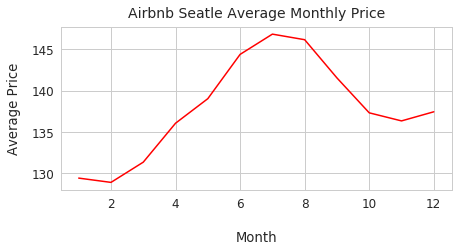

In [31]:
# Plot line graphic is prepared. According to graphic, Prices between June and August are peak in Seatle Airbnb.
sns.set(style='whitegrid',font_scale=1.2)
df_g.set_index('month')['price'].plot(figsize=(7, 3), linewidth=1.5, color='red')
plt.xlabel("Month", labelpad=20)
plt.ylabel("Average Price", labelpad=10)
plt.title("Airbnb Seatle Average Monthly Price", y=1.02, fontsize=14);

#### Answer of Question_1: How do Seatle accommodation prices monthly change to observe season impact on price?

According to monthly average price data in 2016 and 2017, prices increase from February to July. After July, prices decrease until October. Season between June and August has peak average accommodation prices (above 145 USD) in Seatle Airbnb.

#### Question_2: What is the most popular amenities in Seatle Airbnb Listing Data?

In [32]:
# Observe how amenities column is recorded 
df_l['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [33]:
#change format of amenities list while replacing related characters
amt = df_l['amenities'].apply(lambda x: [amenity.replace('"', "").replace("{", "").replace("}", "") 
                                               for amenity in x.split(",")])

In [34]:
# Observe how amenities are recorded in amt.
amt.head()

0    [TV, Cable TV, Internet, Wireless Internet, Ai...
1    [TV, Internet, Wireless Internet, Kitchen, Fre...
2    [TV, Cable TV, Internet, Wireless Internet, Ai...
3    [Internet, Wireless Internet, Kitchen, Indoor ...
4    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, dtype: object

In [35]:
# There were 3818 records having list of amenities.
amt.count()

3818

In [36]:
#set MultiLabelBinarizer to separate amenities
mlb = MultiLabelBinarizer()
label_amt = pd.DataFrame(mlb.fit_transform(amt), columns=mlb.classes_, index=amt.index)

In [37]:
#There were 42 amenities. 0 and 1 boolean values were set for each room record (3818).
label_amt.head()

,,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
2,0,0,1,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1


In [38]:
# Amenities are summed and sorted to define what is the common/popular amenities in Seatle Airbnb dataset.
amt_count=label_amt.sum().sort_values(ascending=False)

In [39]:
# Sorted 42 amenities can be observed below:
amt_count

Wireless Internet             3667
Heating                       3627
Kitchen                       3423
Smoke Detector                3281
Essentials                    3237
Dryer                         2997
Washer                        2992
Internet                      2811
Shampoo                       2670
TV                            2574
Carbon Monoxide Detector      2485
Fire Extinguisher             2196
Free Parking on Premises      2167
Family/Kid Friendly           1963
First Aid Kit                 1680
Cable TV                      1446
Indoor Fireplace               886
Pets live on this property     883
Hangers                        846
Elevator in Building           785
Hair Dryer                     774
Laptop Friendly Workspace      745
Iron                           742
Safety Card                    727
Air Conditioning               677
24-Hour Check-in               616
Buzzer/Wireless Intercom       538
Dog(s)                         509
Pets Allowed        

In [40]:
#Save values into dataframe
d = {'Amenity': amt_count.index, 'Count': amt_count.values}
df_amt_count = pd.DataFrame(data=d)
df_top_5 = df_amt_count.head()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

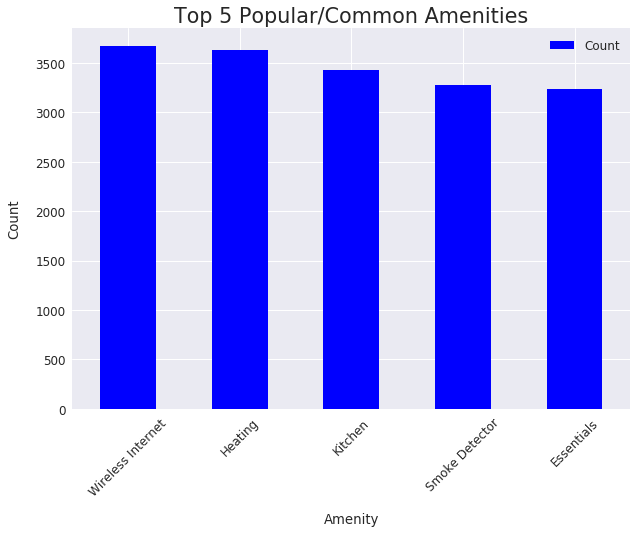

In [41]:
sns.set(font_scale=1.2)
df_top_5.plot(x='Amenity', y='Count', kind='bar', figsize=(10, 7), rot=0, color='blue')
plt.xlabel("Amenity", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Top 5 Popular/Common Amenities", fontsize='x-large')
plt.xticks(rotation=45)

#### Answer of Question_2: What is the most popular/common amenities in Seatle Airbnb Listing Data?

After data analysis for amenities column, I have observed that wireless internet, heating, kitchen, smoke detector and essentials are respectively most common and popular amenities in Seatle Airbnb Data.

#### Question_3: What are the most influential factors to estimate price in Seatle Airbnb Listing Data?

In Seatle Airbnb Dataset, there were many features having impact on price column. First of all, I check price column according to data type and missing values, because price column will be predicted in our designed model.

In [42]:
# Data type of price column is object, so it should be converted to float data type.
print(df_l['price'].dtypes)

object


In [43]:
# There was no missing value for price column.
print(df_l['price'].isnull().sum())

0


In [44]:
# Converting str-format number into numerical value for price column.
df_l['price'] = df_l['price'].replace(r'[$,%]', '', regex = True).astype(float)
print(df_l['price'].dtypes)

float64


In [45]:
# Converting str-format number into numerical value for security_deposit and cleaning_fee columns.
df_l['security_deposit'] = df_l['security_deposit'].replace(r'[$,%]', '', regex = True).astype(float)
df_l['cleaning_fee'] = df_l['cleaning_fee'].replace(r'[$,%]', '', regex = True).astype(float)

In [46]:
# According to my consideration, I have listed important features/columns for estimating the price of accomadation:

listed_features = ['security_deposit', 'cleaning_fee', 'host_total_listings_count', 'latitude', 'longitude',
                   'bathrooms', 'bedrooms', 'beds', 'square_feet', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
                   'review_scores_location','review_scores_value', 'reviews_per_month', 'price']

df_l_model_data = df_l[listed_features]              

In [47]:
# Check the missing values in each columns and define imputation method
df_l_model_data.isnull().sum()[df_l_model_data.isnull().sum()>0]

security_deposit               1952
cleaning_fee                   1030
host_total_listings_count         2
bathrooms                        16
bedrooms                          6
beds                              1
square_feet                    3721
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
reviews_per_month               627
dtype: int64

In [48]:
#Observe sample data in "df_l_model_data" dataframe.
df_l_model_data.head()

,security_deposit,cleaning_fee,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,NaN,NaN,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,85.0
1,100.0,40.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48,150.0
2,1000.0,300.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15,975.0
3,NaN,NaN,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4,700.0,125.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0.89,450.0


In [49]:
#Counts of data for each column
df_l_model_data.count()

security_deposit               1866
cleaning_fee                   2788
host_total_listings_count      3816
latitude                       3818
longitude                      3818
bathrooms                      3802
bedrooms                       3812
beds                           3817
square_feet                      97
review_scores_rating           3171
review_scores_accuracy         3160
review_scores_cleanliness      3165
review_scores_checkin          3160
review_scores_communication    3167
review_scores_location         3163
review_scores_value            3162
reviews_per_month              3191
price                          3818
dtype: int64

In [50]:
#Imputation methods for missing values:
#1."square_feet" column: There are many missing values (3721), so this column will be dropped.
#2."security_deposit" and "cleaning_fee" columns: Missimng values will be replaced with zero. These columns may be saved as NaN, because there is no fee.
#3.Other columns: Missing values will be replaced with mean for all of other columns.
df_l_model_data = df_l_model_data.drop(columns='square_feet')
df_l_model_data['security_deposit'].fillna(0, inplace=True)
df_l_model_data['cleaning_fee'].fillna(0, inplace=True)
df_l_model_data['host_total_listings_count'].fillna(df_l_model_data['host_total_listings_count'].mean(), inplace=True)
df_l_model_data['bathrooms'].fillna(df_l_model_data['bathrooms'].mean(), inplace=True)
df_l_model_data['bedrooms'].fillna(df_l_model_data['bedrooms'].mean(), inplace=True)
df_l_model_data['beds'].fillna(df_l_model_data['beds'].mean(), inplace=True)
df_l_model_data['review_scores_rating'].fillna(df_l_model_data['review_scores_rating'].mean(), inplace=True)
df_l_model_data['review_scores_accuracy'].fillna(df_l_model_data['review_scores_accuracy'].mean(), inplace=True)
df_l_model_data['review_scores_cleanliness'].fillna(df_l_model_data['review_scores_cleanliness'].mean(), inplace=True)
df_l_model_data['review_scores_checkin'].fillna(df_l_model_data['review_scores_checkin'].mean(), inplace=True)
df_l_model_data['review_scores_communication'].fillna(df_l_model_data['review_scores_communication'].mean(), inplace=True)
df_l_model_data['review_scores_location'].fillna(df_l_model_data['review_scores_location'].mean(), inplace=True)
df_l_model_data['review_scores_value'].fillna(df_l_model_data['review_scores_value'].mean(), inplace=True)
df_l_model_data['reviews_per_month'].fillna(df_l_model_data['reviews_per_month'].mean(), inplace=True)

In [51]:
#After imputation actions, counts of each column in df_l_model_data dataframe can be seen below.
#There is no missing value and there are 3818 records for all column.
df_l_model_data.count()

security_deposit               3818
cleaning_fee                   3818
host_total_listings_count      3818
latitude                       3818
longitude                      3818
bathrooms                      3818
bedrooms                       3818
beds                           3818
review_scores_rating           3818
review_scores_accuracy         3818
review_scores_cleanliness      3818
review_scores_checkin          3818
review_scores_communication    3818
review_scores_location         3818
review_scores_value            3818
reviews_per_month              3818
price                          3818
dtype: int64

In [52]:
# data types of columns can also be seen below:
df_l_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 17 columns):
security_deposit               3818 non-null float64
cleaning_fee                   3818 non-null float64
host_total_listings_count      3818 non-null float64
latitude                       3818 non-null float64
longitude                      3818 non-null float64
bathrooms                      3818 non-null float64
bedrooms                       3818 non-null float64
beds                           3818 non-null float64
review_scores_rating           3818 non-null float64
review_scores_accuracy         3818 non-null float64
review_scores_cleanliness      3818 non-null float64
review_scores_checkin          3818 non-null float64
review_scores_communication    3818 non-null float64
review_scores_location         3818 non-null float64
review_scores_value            3818 non-null float64
reviews_per_month              3818 non-null float64
price                          3818 non-null 

In [53]:
# Sample data in dataframe
df_l_model_data.head()

,security_deposit,cleaning_fee,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,0.0,0.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,4.070000,85.0
1,100.0,40.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.480000,150.0
2,1000.0,300.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.150000,975.0
3,0.0,0.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919,100.0
4,700.0,125.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.890000,450.0


In [54]:
# 16 Numerical variables: I think that they have impact while predicting price.
X = df_l_model_data[['security_deposit', 'cleaning_fee', 'host_total_listings_count', 'latitude',
        'longitude','bathrooms','bedrooms','beds','review_scores_rating','review_scores_accuracy',
        'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
        'review_scores_location','review_scores_value','reviews_per_month']]
# Price is assigned to y as predicted column.
y = df_l_model_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [55]:
#traing score
print(train_score)

0.50267527399


In [56]:
#test score
print(test_score)

0.53159082937


In my model, r-squared value is 0.53 which is not too high. Furhermore, I also investigate coefficients of my model to show impact of variables while predicting price.

Reference: "coef_weights" function is also taken from Udacity jupyter notebook examples (Putting It All Together part). 

In [57]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)


,est_int,coefs,abs_coefs
4,longitude,-117.946980,117.946980
3,latitude,-87.968228,87.968228
5,bathrooms,25.283847,25.283847
6,bedrooms,24.872758,24.872758
14,review_scores_value,-15.676053,15.676053
7,beds,13.595336,13.595336
13,review_scores_location,11.646317,11.646317
9,review_scores_accuracy,6.599806,6.599806
12,review_scores_communication,5.529090,5.529090
11,review_scores_checkin,-4.873345,4.873345


#### Answer of Question_3: What are the most influential factors to estimate price in Seatle Airbnb Listing Data?

I used 16 variables which may impact on predicting price. r-squared value of my model is 0.53 which is not too high. According to my model, geographic location (longitude, latitude), the number of bedroom and bathroom, review score variables have impact while predicting price in Seatle Airbnb Data.